In [1]:
if __name__=='__main__':
    import notebookimport
    
    sr = __import__("Charts - Stage Results")


importing Jupyter notebook from Charts - Stage Results.ipynb


In [ ]:
#TO DO: need a filter for particular day
#eg day 1, day 2.

In [2]:
import pandas as pd

from IPython.display import HTML

import dakar_utils as dakar
from dakar_utils import moveColumn, sparkline2, sparklineStep, moreStyleDriverSplitReportBaseDataframe

In [3]:
import sqlite3

dbname='dakar_sql.sqlite'

conn = sqlite3.connect(dbname)

c = conn.cursor()


In [4]:
dbname2='sweden19.db'
conn2 = sqlite3.connect(dbname2)

c2 = conn2.cursor()


In [5]:
from IPython.display import HTML

In [6]:
def _rebaseTimes(times, bib=None):
    if bib is None: return times
    return times - times.loc[bib]

In [7]:
REBASER=306

In [8]:
q= 'SELECT entryId, `driver.code` AS Code FROM startlists'
codes = pd.read_sql(q,conn2).set_index('entryId')
codes.head()

,Code
entryId,
3526,OGI
3527,SUN
3528,LAP
3529,MEE
3530,TID


In [27]:
%%capture
#For WRC
rc='RC1'
rally='Sweden'
typ='overall'
wREBASE='LAP'

def gapToLeaderBar(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'diffFirstMs']].pivot(index='entryId',columns='snum',values='diffFirstMs')
    Xtmpq = Xtmpq/1000
    if typ=='stage':
        Xtmpq.columns = ['SS_{}'.format(c) for c in Xtmpq.columns]
    else:
        Xtmpq.columns = ['SS_{}_{}'.format(c, typ) for c in Xtmpq.columns]
    k = '{}GapToLeader'.format(typ)
    Xtmpq[k]= Xtmpq[[c for c in Xtmpq.columns ]].values.tolist()
    Xtmpq[k] = Xtmpq[k].apply(lambda x: [-y for y in x])
    Xtmpq[k] = Xtmpq[k].apply(sparkline2, typ='bar', dot=True)
    return Xtmpq 


wrc = pd.merge(codes,gapToLeaderBar(conn2, rally, rc, 'overall'), left_index=True, right_index=True)

wrc =  pd.merge(wrc,gapToLeaderBar(conn2, rally, rc, 'stage'), left_index=True, right_index=True)

wrc.head(10)

In [23]:
%%capture
def positionStep(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'position']].pivot(index='entryId',columns='snum',values='position')
    Xtmpq.columns = ['SS_{}_{}_pos'.format(c, typ) for c in Xtmpq.columns]
    k = '{}Position'.format(typ)
    Xtmpq[k]= Xtmpq[[c for c in Xtmpq.columns ]].values.tolist()
    Xtmpq[k] = Xtmpq[k].apply(lambda x: [-y for y in x])
    Xtmpq[k] = Xtmpq[k].apply(sparklineStep)
    return Xtmpq 

def overallAtLastStage(conn, rally, rc, typ):
    Xtmpq = sr.dbGetStageRank(conn, rally, rc, typ)#.head()
    Xtmpq = Xtmpq[['entryId','snum', 'position']].pivot(index='entryId',columns='snum',values='position')
    last = Xtmpq.columns
    return Xtmpq[[last[-1]]]
    
    
wrc =  pd.merge(wrc,positionStep(conn2, rally, rc, typ='stage')[['stagePosition']], left_index=True, right_index=True)
wrc =  pd.merge(wrc,positionStep(conn2, rally, rc, typ='overall')[['overallPosition']], left_index=True, right_index=True)
wrc['Pos'] = overallAtLastStage(conn2, rally, rc, typ)

wrc = wrc.sort_values('Pos', ascending=True)
wrc=wrc.set_index('Code',drop=True)
cols = [c for c in wrc.columns if c.startswith('SS')]
wrc.rename(columns={'stageGapToLeader':'stageWinnerGap'},inplace=True)
wrc[cols] = -wrc[cols].apply(_rebaseTimes,bib=wREBASE, axis=0)




In [24]:
moveColumn(wrc, 'stagePosition',left_of='SS_1')
moveColumn(wrc, 'stageWinnerGap',left_of='SS_1')
moveColumn(wrc, 'overallPosition',left_of='SS_1_overall')
moveColumn(wrc, 'overallGapToLeader',left_of='SS_1_overall')
moveColumn(wrc, 'Pos',left_of='SS_1_overall') #pos=None, left_of=None, right_of=None)
wrc

,overallPosition,overallGapToLeader,Pos,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,...,stagePosition,stageWinnerGap,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8
Code,,,,,,,,,,,,,,,,,,,,,
SUN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",1.0,0.3,4.4,9.0,9.3,39.6,50.1,55.9,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",0.3,4.1,4.6,0.3,30.3,10.5,5.8,-13.9
TÄN,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",2.0,1.1,9.0,12.5,14.8,37.7,42.1,42.9,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",1.1,7.9,3.5,2.3,22.9,4.4,0.8,-2.9
MIK,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3.0,1.9,0.6,-2.1,-2.5,19.5,24.1,28.7,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",1.9,-1.3,-2.7,-0.4,22.0,4.6,4.6,-4.5
EVA,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",4.0,-1.8,-19.8,-31.5,-30.3,5.6,10.1,21.0,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-1.8,-18.0,-11.7,1.2,35.9,4.5,10.9,-7.6
LAP,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",5.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
LOE,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",6.0,-3.0,-13.1,-22.6,-28.7,-7.4,-2.1,4.4,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-3.0,-10.1,-9.5,-6.1,21.3,5.3,6.5,-11.2
NEU,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",7.0,3.0,5.2,8.3,8.8,8.1,5.0,1.1,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",3.0,2.2,3.1,0.5,-0.7,-3.1,-3.9,-11.8
MEE,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",8.0,-1.4,-1.7,-9.1,-15.0,9.6,11.2,2.9,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-1.4,-0.3,-7.4,-5.9,24.6,1.6,-8.3,-14.0
TID,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",9.0,-1.8,-16.8,-36.1,-51.7,-25.1,-27.2,-29.4,...,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-1.8,-15.0,-19.3,-15.6,26.6,-2.1,-2.2,-13.0


In [25]:
s2 = moreStyleDriverSplitReportBaseDataframe(wrc.fillna(0),'')

#Introduce a dot marker to highlight winner
display(HTML(s2))
dakar.getTablePNG(s2)

,overallPosition,overallGapToLeader,Pos,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,stagePosition,stageWinnerGap,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8
Code,,,,,,,,,,,,,,,,,,,,,
SUN,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAjRJREFUeJzt28tqE2EYxvF/xS66yUZKiO6rxI1bb8CduPIavAzxKrwDQRCkuOsdiJsiGGgXb07UEnKeJDM5TGZclAaGirb5Jn4mPL/du8g3L5kn7xyzl6Zpisia7vluQLabAiROFCBxct93A7vsw9cGx6cXvtu4ofywwNuXT3NZK7cAtVqtvJbaGZ%2B%2BVTlvRxwdHvhuJSMMwxv7q1gsrrXW1k2gz9/bnJx1fbdxK9fhef/6ie9WNmbrzoFOzrqctyPfbdzK0eEBLx4/8N3GRm3dBAJ2/le9TbZuAsn/JbcJtO5J2F3t79s/3Z78mSaQOFGAxIkCJE4UIHHi5TLe5RZ/5TKgXCrk3JGsy8sEOj69oHIZrPXZcqnAq2ePcu5I1uXtRmK5VODjm%2Be%2BNi852ViA3n35QeXn76eMDkO7w8shTIeh3bGnd6LFhS7jxYkCJE4UIHGiAIkTBUicKEDiRAESJwqQONlogMyMfr8PQJqmmBmDwQCAJEkwM4bDIQDL5TJTx3GMmREEV49DFosFZsZoNAJgPp9jZozH40w9mUwAmM1mmBlhGAIwnU4zdRRFmBlRdPUPjzAMMTOm02mmns1mAEwmE8yM%2BXwOwHg8ztSj0QgzY7FYABAEAWZGHMcADIdDzIzlcpmpkyQBYDAYYGZc39ft9/uY2eq77PV6VKvVVd3tdqnVaqu60%2BlQr9czdaPRWNXtdptms/n3nXZHmkDiRI8yxIkmkDhRgMSJAiROFCBx8guh/w9kbcvm8wAAAABJRU5ErkJggg%3D%3D"" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAUVJREFUeJzt2EFqwkAYxfEvTRnIEbIQsvQKrhzwHj2GB/IewrjKNQIueoTCQEiXjSmlmtdJYvr/rRR8YyCPL59mXdd1Boz0MvcF4LlRIEgoECSvSU/Pspu378ejfWy33z%2B333%2B9vlzuO3vJmWFuJkVRWFmWSb8jS7pEDwr0o/4lrCEzzPXU19pCE8xX3nab3V1HTZUZI%2B0Ewo36WtvhdLDYRnO5s/Pb%2BdebO1VmLHagCYUmWGyjtV1rsY0WmrCYzFgUaEK%2B8uZyZ3mWm8ud%2BcovJjMWO1CKzDDXs7YdiAKlyAxzK8YjDBIKBAk/4x/xTx5Lj2ACQUKBIKFAkKTdgdgZVo8JBAkFgoQCQbKO/4HYtWbDBIKEAkFCgSChQJAsb4lmIX4qTCBIKBAkFAiS5e1AU2HX%2BhNMIEgoECQUCBIKBAkFguQTjnWwOdQ0fDQAAAAASUVORK5CYII%3D"" />",1,0.3,4.4,9,9.3,39.6,50.1,55.9,42,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAqdJREFUeJzt289qE1EUx/FvxSrddCOltIXiqkq76a64FtxJVyL0BcSnEJ9CfAFBFETcdeNSxI0IBlvhpE2oIUzSJJM/M5lJMi5KA4PaOvcmmTRzPrtDOJlD8svcm5lkLoqiCKUMXUt7AHW1aYCUFQ2QsnI97QGSevW5wPuvJ0a9u9tr7O2sj3iif7OZFSY/r4mRBahcLo/qqS709kueQ8djY2khUd%2Bh4xGGAfdv3xzTZH8ynRUmP%2B/y8rJRXypnoHffHPYPqka952/Ii0d3E/U9ffPD6Hi2TGaF9OZNKpU90P5BlUPHM%2BrdWFrgwZ1bI55ImUptD2T6yVTT5cptotNguuSa7n%2BukpEFKMkmbH5eEvfYsjnmRxF%2BVnw2VxYT9W2t3mB3e83omGm8Rib0DPSfNlcWef3kXtpjTB0N0BTLlVwev/yUuG%2BS1480QFNqd3vNqC9XcgE0QFm3t7NuFAKTM5aNTAXIdEnIldzEG%2BisyEyATJcEONtA2/TPsswEyHRJUBcbW4Cef/hO7pf718d0SZgdqdwL0yVhdoztDPTs4da4nlpNEf1ForKiAVJWNEDKigZIWdEAKSuZuZCYJZfdstlcXRzZt2QN0IyZ9PW1Of1vvLIx1j2QiFCr1QCIoggRoV6vAzAYDBARGo0GAP1%2BP1b3ej1EBNc9ux0ShiEiQrPZBCAIAkSEVqsVq9vtNgDdbhcRodPpAOD7fqz2PA8RwfPO/h3S6XQQEXzfj9XdbheAdruNiBAEAQCtVitWN5tNRIQwDAFwXRcRodfrAdBoNBAR%2Bv1%2BrB4MBgDU63VEhPPPc61WQ0SGr%2BXp6Sn5fH5YV6tVjo6OhnWlUuH4%2BDhWFwqFYe04DsVi8fI3LSHdRCsruoQpK3oGUlY0QMqKBkhZ0QApK78B3xpIFL/UlhIAAAAASUVORK5CYII%3D"" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAYhJREFUeJzt2j1uwkAQhuFxHK2UA6RIEckKDTUdFdvkBrRcg0NwDSrOkAYqOmokmkhRlCIHiGQrdrpkwTgyO/7B1vtUIO14x/jTro0cZFmWCeDppu0G0G0ECCoECCq3tR49CI6%2Bfszn8jUc5sdNJn%2BfN5tyx3ZrHLvPncxeZhJ/x2JCI8vnpYzuR/mBPvOUrSnor/Le3HnO1Nzt9/KwWORrKrztrTdAJ86ejMjxCQ0G5Q5W8COs3leSpImkkkqSJnKIDzJ9muYH%2BsxTtqagv8p7c%2Be5pKZCvdvCbGTFhEbCIBQTGrGRbbulX9fcm6%2Bg1sf4ky2skNuCT82J7dtW1q9rsZGV8eO4%2Bd7%2B6a/S3tx5KujNRy8DVJumLlKHAlTvPRD/UfZe7%2B6B0KxGn8JKYdXqFFYgqBAgqFzfFoZObeME6BIdurBNYQuDCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCgGCCq9z9EVLr5qwAkGFAEGFAEGFAEGFAEHlB6KnhrNS5gtoAAAAAElFTkSu

'testpng/testhtml.png'

In [232]:
#Need a WRC query for this
data
#cols SS, Overall position, Stage position, with a driver index

,SS,Overall,Stage
Bib,,,
306,1,13,13
306,2,5,1
306,3,8,11
306,4,6,5
306,5,5,1
306,6,2,1
306,7,4,11
306,8,3,1
306,9,3,18


NameError: name 'plt' is not defined

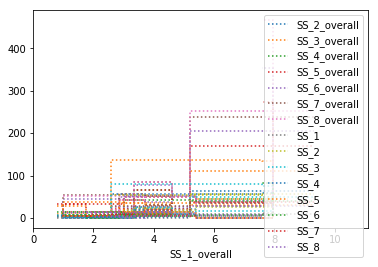

In [29]:
wrc.plot(x='SS_1_overall',drawstyle="steps-mid",linestyle=':')
plt.gca().invert_yaxis()